<h1 align="center">Assignment 2</h1>

<p><strong>Nama:</strong> Muhammad Rinande Ansutia<br>
   <strong>No:</strong> PYTN-KS19-021<br>
   <strong>Dataset:</strong> NYC Property Sales</p>

## Project Overview

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

## Import Library

In [79]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

## Preprocessing

In [2]:
# read the dataset
df = pd.read_csv ("nyc-rolling-sales.csv")

In [3]:
# menampilkan 5 teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# menampilkan 5 terbawah
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
# menampilkan baris dan kolom
df.shape

(84548, 22)

Pada dataset "nyc-rolling-sales.csv", terdapat sebanyak 84548 baris dengan 22 kolom.

In [6]:
# menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
# hapus kolom yang tidak diperlukan
df.drop(['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
# mengganti nama borough
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [9]:
# melihat ringkasan kolom
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,1789.322976,1.657485
std,3568.263407,658.136814,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [10]:
# mengubah type data kolom menjadi lebih sesuai

df['BOROUGH'] = df['BOROUGH'].astype('string')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('string')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [12]:
# cek missing value
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Terdapat 3 kolom yang memiliki nilai null yai"tu `'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE '`. Kita akan mendropnya.

In [13]:
# drop missing value
df = df.dropna()

In [14]:
# cek kembali apakah masih ada missing value 
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [15]:
# cek duplikat value
df.duplicated().sum()

403

Terdapat 403 data yang duplikat. 

Karena terdapat 403 data duplikat, maka data yang duplikat tersebut akan kita hapus.

In [16]:
# drop data duplicat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

C:\Users\Nande\AppData\Local\Temp\ipykernel_2276\4102668021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


0

In [17]:
# memeriksa apakah ada nilai unik di setiap kolom
for kolom in df.columns:
    unique_values = df[kolom].unique()
    print(f'Unique values in column {kolom}:')
    pprint(unique_values)
    print()

Unique values in column BOROUGH:
<StringArray>
['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Islands']
Length: 5, dtype: string

Unique values in column NEIGHBORHOOD:
<StringArray>
[    'ALPHABET CITY',           'CHELSEA',         'CHINATOWN',
      'CIVIC CENTER',           'CLINTON',      'EAST VILLAGE',
           'FASHION',         'FINANCIAL',          'FLATIRON',
          'GRAMERCY',
 ...
         'STAPLETON', 'STAPLETON-CLIFTON',         'TODT HILL',
     'TOMPKINSVILLE',       'TOTTENVILLE',            'TRAVIS',
 'WEST NEW BRIGHTON',       'WESTERLEIGH',       'WILLOWBROOK',
           'WOODROW']
Length: 251, dtype: string

Unique values in column BUILDING CLASS CATEGORY:
['07 RENTALS - WALKUP APARTMENTS             ', '08 RENTALS - ELEVATOR APARTMENTS           ', '09 COOPS - WALKUP APARTMENTS               ', '14 RENTALS - 4-10 UNIT                     ', '22 STORE BUILDINGS                         ', ..., '49 CONDO WAREHOUSES/FACTORY/INDUS          ', '42 CONDO CULT

Berdasarkan output di atas, terdapat beberapa nilai unik, maka nilai tersebut harus dihilangkan dari dataset.

In [18]:
# menghapus nilai unik yang terdapat di kolom
df_prepro = df[(df["LAND SQUARE FEET"] != 0) & 
            (df["GROSS SQUARE FEET"] != 0) & 
            (df["YEAR BUILT"] != 0) & 
            (df["SALE PRICE"] != 0) & 
            (df["TOTAL UNITS"] != 0)
            ]

## Measure of Central Tendency



### 1. Mean

Pertanyaan: Berapa harga rata-rata penjualan properti di setiap wilayah?

In [19]:
# Menghitung rata-rata harga penjualan di setiap wilayah
df_prepro.groupby(['BOROUGH'])[['SALE PRICE']].mean()

,SALE PRICE
BOROUGH,
Bronx,1.023379e+06
Brooklyn,1.506458e+06
Manhattan,1.929664e+07
Queens,9.074128e+05
Staten Islands,5.272380e+05


Analisis rata-rata harga penjualan properti di setiap wilayah (borough) menunjukkan perbedaan signifikan dalam pasar real estat Kota New York: 
1. Manhattan menonjol sebagai wilayah dengan tingkat harga tertinggi, dengan rata-rata penjualan mencapai \\$19,296,643
2. Brooklyn dan Bronx juga menunjukkan tingkat harga yang cukup tinggi, masing-masing dengan rata-rata \\$1,506,457 dan \\$1,023,378. 
3. Sementara itu, Queens menampilkan rata-rata harga penjualan yang lebih rendah, sekitar \\$907,412.
4. Staten Island menjadi wilayah dengan rata-rata harga penjualan paling rendah, yakni \\$527,238.

### 2. Median

Pertanyaan: Berapakah nilai median sale price dari berdasarkan 5 tax class at present?

In [20]:
# Menggunakan np.median untuk menghitung median
df_median = df_prepro.pivot_table(
    index='TAX CLASS AT PRESENT', 
    values='SALE PRICE', 
    aggfunc=np.median  
)

# Rename kolom 'SALE PRICE' menjadi 'MEDIAN SALE PRICE'
df_median.rename(columns={'SALE PRICE': 'MEDIAN SALE PRICE'}, inplace=True)

# Sort df berdasarkan kolom 'MEDIAN SALE PRICE'
df_median.sort_values('MEDIAN SALE PRICE', ascending=False, inplace=True)
df_median

,MEDIAN SALE PRICE
TAX CLASS AT PRESENT,
2,6810000.0
2B,2225000.0
4,2000000.0
2A,1175000.0
1,578000.0
2C,90000.0


Berdasarkan tabel median sale price untuk setiap tax class at present, kita dapat mengambil kesimpulan sebagai berikut:
1. Tax Class 2 (2): Tax Class 2 menonjol dengan median sale price tertinggi sebesar \\$6,810,000.00. 
2. Tax Class 2B (2B): Tax Class 2B memiliki median sale price sebesar \\$2,225,000.00.
3. Tax Class 4 (4): Tax Class 4 menunjukkan median sale price sebesar \\$2,000,000.00. 
4. Tax Class 2A (2A): Tax Class 2A memiliki median sale price sebesar \\$1,175,000.00. 
5. Tax Class 1 (1): Tax Class 1 menunjukkan median sale price terendah sebesar $578,000.00.
6. Tax Class 2C (2C): Tax Class 2C menunjukkan median sale price paling rendah sebesar \\$90,000.00.

### 3. Modus

Pertanyaan: 'BUILDING_CLASS_CATEGORY' apakah yang paling sering terjual di semua wilayah tersebut?

In [24]:
# Menggunakan groupby untuk menghitung modus dari BUILDING_CLASS_CATEGORY di setiap wilayah
mode_building_class_by_borough = df_prepro.groupby(['BOROUGH'])[['BUILDING CLASS CATEGORY']].agg(lambda x: x.mode().iloc[0])
mode_building_class_by_borough

,BUILDING CLASS CATEGORY
BOROUGH,
Bronx,02 TWO FAMILY DWELLINGS
Brooklyn,02 TWO FAMILY DWELLINGS
Manhattan,07 RENTALS - WALKUP APARTMENTS
Queens,01 ONE FAMILY DWELLINGS
Staten Islands,01 ONE FAMILY DWELLINGS


Dari tabel output di atas, dapat diambil kesimpulan sebagai berikut:
1. Bronx: BUILDING_CLASS_CATEGORY yang sering terjual adalah "02 TWO FAMILY DWELLINGS" di wilayah Bronx.
2. Brooklyn: BUILDING_CLASS_CATEGORY yang sering terjual juga adalah "02 TWO FAMILY DWELLINGS" di wilayah Brooklyn.
3. Manhattan: BUILDING_CLASS_CATEGORY yang sering terjual di Manhattan adalah "07 RENTALS - WALKUP APARTMENTS". Ini menunjukkan bahwa di Manhattan, jenis properti ini lebih umum terjual dibandingkan dengan jenis lainnya.
4. Queens: BUILDING_CLASS_CATEGORY yang sering terjual adalah "01 ONE FAMILY DWELLINGS" di wilayah Queens.
5. Staten Island: BUILDING_CLASS_CATEGORY yang sering terjual juga adalah "01 ONE FAMILY DWELLINGS" di wilayah Staten Island.

## Measures of Spread

### 1. Range

Pertanyaan: Berapa range dari kolom 'GROSS SQUARE FEET' dan 'LAND SQUARE FEET'?

In [42]:
# Menghitung rentang dari kolom 'GROSS SQUARE FEET' dan 'LAND SQUARE FEET'
range_gross_square_feet = np.ptp(df_prepro['GROSS SQUARE FEET'])
range_land_square_feet = np.ptp(df_prepro['LAND SQUARE FEET'])

# Menampilkan nilai minimum dan maksimum
min_gross_square_feet = df_prepro['GROSS SQUARE FEET'].min()
max_gross_square_feet = df_prepro['GROSS SQUARE FEET'].max()
min_land_square_feet = df_prepro['LAND SQUARE FEET'].min()
max_land_square_feet = df_prepro['LAND SQUARE FEET'].max()

# Menampilkan hasil
print(f"Nilai Min Gross Square Feet: {min_gross_square_feet}")
print(f"Nilai Max Gross Square Feet: {max_gross_square_feet}")
print(f"Nilai Min Land Square Feet: {min_land_square_feet}")
print(f"Nilai Max Land Square Feet: {max_land_square_feet}")
print("Range dari Gross Square Feet:", range_gross_square_feet)
print("Range dari Land Square Feet :", range_land_square_feet)

Nilai Min Gross Square Feet: 120.0
Nilai Max Gross Square Feet: 3750565.0
Nilai Min Land Square Feet: 200.0
Nilai Max Land Square Feet: 4228300.0
Range dari Gross Square Feet: 3750445.0
Range dari Land Square Feet : 4228100.0


Dari hasil di atas dapat diambil kesimpulan sebagai berikut:
1. Gross Square Feet (GSF):
- Nilai minimum GSF adalah 120.0, yang menunjukkan bahwa terdapat properti dengan luas yang sangat kecil.
- Nilai maksimum GSF adalah 3,750,565.0, menunjukkan adanya properti dengan luas yang sangat besar.
- Rentang GSF antara nilai minimum dan maksimum adalah 3,750,445.0, menunjukkan variasi yang signifikan dalam ukuran properti.

2. Land Square Feet (LSF):
- Nilai minimum LSF adalah 200.0, yang menunjukkan bahwa terdapat properti tanah dengan luas yang sangat kecil.
- Nilai maksimum LSF adalah 4,228,300.0, menunjukkan adanya properti tanah dengan luas yang sangat besar.
- Rentang LSF antara nilai minimum dan maksimum adalah 4,228,100.0, menunjukkan variasi yang signifikan dalam ukuran tanah properti.

### 2. Variance

Pertanyaan: Berapakah variabilitas (varians) dari kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' untuk setiap wilayah (borough) di New York City?

In [48]:
# List kolom yang akan dianalisis
columns_to_analyze = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

# Membuat dataframe baru hanya dengan kolom yang dianalisis
selected_data = df_prepro[['BOROUGH'] + columns_to_analyze]

# Mengelompokkan data berdasarkan borough dan menghitung varians untuk setiap kolom
variance_by_borough = selected_data.groupby('BOROUGH').var()

# Menampilkan hasil
variance_by_borough

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,4.000191e+08,7.361073e+08,1.446445e+13
Brooklyn,1.621196e+08,1.572789e+08,2.240319e+13
Manhattan,1.311041e+08,1.176257e+10,8.082665e+15
Queens,1.647597e+09,1.394512e+09,1.376715e+13
Staten Islands,2.568055e+09,2.278792e+08,2.180988e+11


Dari output tersebut, kita dapat membuat beberapa kesimpulan terkait variabilitas (varians) dari kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' untuk setiap wilayah (borough) di New York City:
1. LAND SQUARE FEET: Staten Island memiliki variabilitas tertinggi dalam luas tanah (LAND SQUARE FEET), diikuti oleh Queens, Manhattan, Bronx, dan Brooklyn.
2. GROSS SQUARE FEET: Manhattan menunjukkan variabilitas tertinggi dalam luas bangunan (GROSS SQUARE FEET), diikuti oleh Queens, Staten Island, Brooklyn, dan Bronx.
3. SALE PRICE: Manhattan menunjukkan variabilitas tertinggi dalam harga jual properti (SALE PRICE), diikuti oleh Brooklyn, Queens, Bronx, dan Staten Island.

### 3. Standard Deviation

Pertanyaan: Berapakah standar deviation dari kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' untuk setiap wilayah (borough) di New York City?

In [50]:
# List kolom yang akan dianalisis
columns_to_analyze = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

# Membuat dataframe baru hanya dengan kolom yang dianalisis
selected_data = df_prepro[['BOROUGH'] + columns_to_analyze]

# Mengelompokkan data berdasarkan borough dan menghitung standar deviasi untuk setiap kolom
std_deviation_by_borough = selected_data.groupby('BOROUGH').std()

# Menampilkan hasil
print("Standar deviasi untuk setiap kolom berdasarkan wilayah (borough):")
std_deviation_by_borough

Standar deviasi untuk setiap kolom berdasarkan wilayah (borough):


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,20000.477817,27131.298196,3.803216e+06
Brooklyn,12732.617832,12541.089319,4.733201e+06
Manhattan,11450.068059,108455.392567,8.990364e+07
Queens,40590.603100,37343.164315,3.710411e+06
Staten Islands,50675.977339,15095.668833,4.670105e+05


Dari output tersebut, kita dapat membuat beberapa kesimpulan terkait standar deviasi dari kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' untuk setiap wilayah (borough) di New York City:
1. LAND SQUARE FEET:
- Staten Island memiliki standar deviasi tertinggi dalam luas tanah (LAND SQUARE FEET), yang menunjukkan variasi yang signifikan antar properti di borough tersebut.
- Manhattan memiliki standar deviasi terendah dalam luas tanah, menunjukkan tingkat konsistensi yang lebih tinggi dalam ukuran tanah properti.
2. GROSS SQUARE FEET:
- Manhattan memiliki standar deviasi tertinggi dalam luas bangunan (GROSS SQUARE FEET), menunjukkan keragaman besar dalam ukuran bangunan di borough tersebut.
- Bronx dan Brooklyn juga memiliki standar deviasi yang cukup tinggi dalam luas bangunan.
3. SALE PRICE:
- Manhattan memiliki standar deviasi tertinggi dalam harga jual properti (SALE PRICE), menunjukkan variasi besar dalam nilai properti di borough tersebut.
- Staten Island menunjukkan standar deviasi yang rendah dalam harga jual, menunjukkan konsistensi yang lebih tinggi dalam harga properti di borough tersebut.

## Probability Distribution

Pertanyaan: Berapakah probability distribution untuk distribusi 'SALE PRICE' ?

In [67]:
df_pd = df_prepro[(df_prepro['SALE PRICE'] > 1000) & (df_prepro['SALE PRICE'] < 1E6)]

[Text(0.5, 0, 'Sale Price'), Text(0.5, 1.0, 'Distribusi SALE PRICE')]

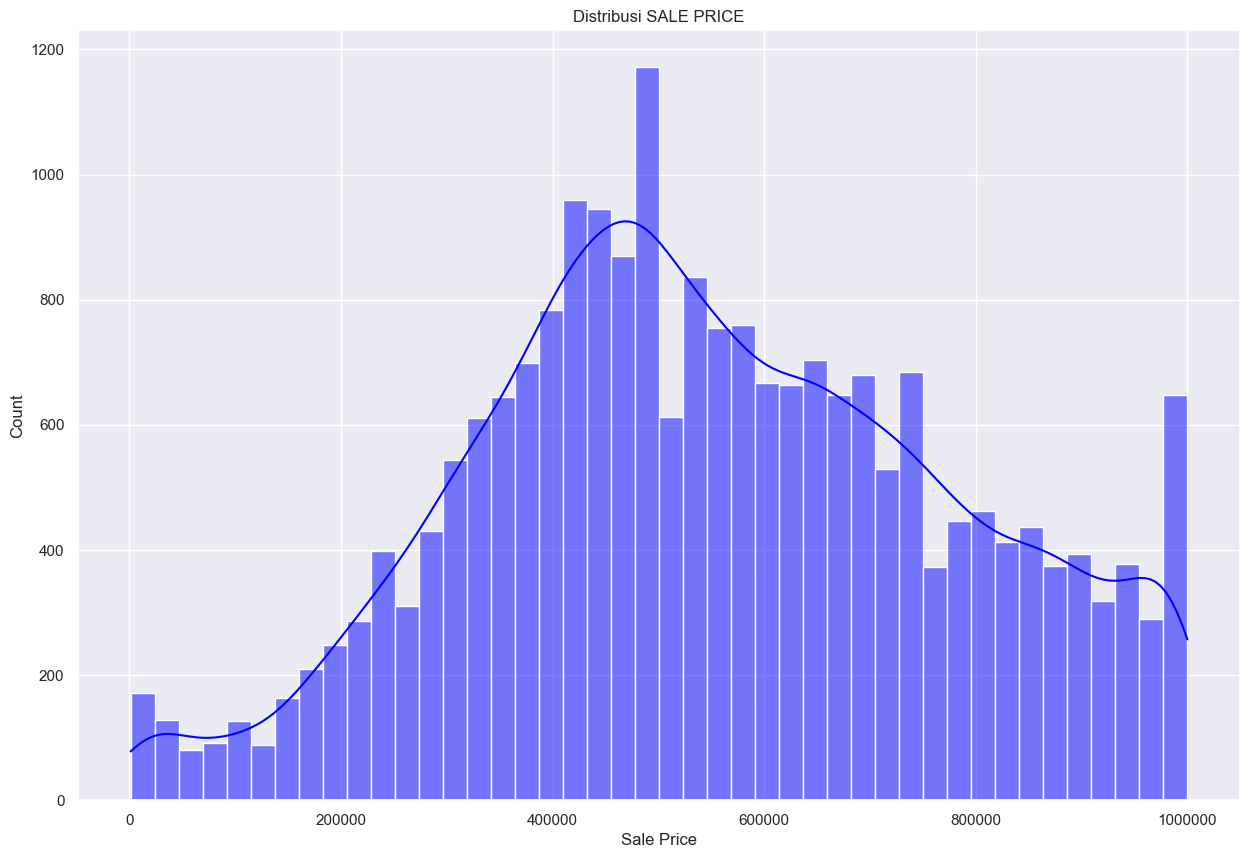

In [72]:
sns.set(rc={"figure.figsize": (15, 10)})
ax = sns.histplot(df_pd['SALE PRICE'], kde=True, color='blue')
ax.ticklabel_format(style='plain')
ax.set(xlabel='Sale Price', title='Distribusi SALE PRICE')

Berdasarkan plot diatas, probability distribution untuk distribusi 'SALE PRICE' terlihat normal.

## Confidence Intervals

Pertanyaan: Berapa nilai Confidence interval dari rata-rata 'SALE PRICE' di borough Manhattan yang sebenarnya?

In [77]:
# Filter data hanya untuk borough Manhattan
manhattan_data = df_prepro[df_prepro['BOROUGH'] == 'Manhattan']

# Menghitung confidence interval untuk rata-rata 'SALE PRICE' di borough Manhattan
confidence_interval = stats.t.interval(0.95, len(manhattan_data)-1, loc=manhattan_data['SALE PRICE'].mean(), scale=stats.sem(manhattan_data['SALE PRICE']))

# Menampilkan confidence interval
print(f"Confidence Interval untuk rata-rata 'SALE PRICE' di borough Manhattan: {confidence_interval}")

Confidence Interval untuk rata-rata 'SALE PRICE' di borough Manhattan: (13602371.458904946, 24990915.80776172)


Berdasarkan hasil perhitungan di atas, menunjukkan bahwa rata-rata 'SALE PRICE' di borough Manhattan yang sebenarnya berada di rentang \\$13,602,371 hingga \\$24,990,916.

## Hypothesis Testing

Pertanyaan: Apakah rata-rata 'SALE PRICE' di borough Manhattan signifikan lebih tinggi daripada rata-rata 'SALE PRICE' secara keseluruhan?

- Hipotesis Nol (H0): μ_manhattan = μ_total (Tidak ada perbedaan signifikan antara rata-rata 'SALE PRICE' di borough Manhattan dengan rata-rata 'SALE PRICE' secara keseluruhan)
- Hipotesis Alternatif (H1): μ_manhattan > μ_total (Rata-rata 'SALE PRICE' di borough Manhattan lebih tinggi daripada rata-rata 'SALE PRICE' secara keseluruhan)

Untuk menguji hipotesis ini, kita dapat menggunakan one-sample t-test.

In [82]:
# Data 'SALE PRICE' untuk borough Manhattan
manhattan_data = df_prepro[df_prepro['BOROUGH'] == 'Manhattan']['SALE PRICE']

# Rata-rata 'SALE PRICE' secara keseluruhan
total_mean = df_prepro['SALE PRICE'].mean()

# Melakukan one-sample t-test
t_stat, p_value = stats.ttest_1samp(manhattan_data, total_mean)

# Menampilkan hasil uji hipotesis
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Menentukan tingkat signifikansi (alpha)
alpha = 0.05

# Membandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: 6.085673504237288
P-value: 1.6749662148148605e-09
Reject the null hypothesis


Dengan T-statistik sebesar 6.09 dan nilai P-value yang sangat kecil (1.67e-09), dapat disimmpulkan bahwa terdapat bukti statistik yang signifikan untuk menolak hipotesis nol. Oleh karena itu, dapat disimmpulkan bahwa rata-rata 'SALE PRICE' di borough Manhattan signifikan lebih tinggi daripada rata-rata 'SALE PRICE' secara keseluruhan. Ini berarti ada perbedaan yang signifikan antara rata-rata 'SALE PRICE' di Manhattan dengan rata-rata 'SALE PRICE' secara keseluruhan di New York City.

## Kesimpulan

Setelah melakukan analisis secara menyeluruh, dapat ditarik beberapa kesimpulan sebagai berikut:
1. Measure of Central Tendency:
    * Mean: Analisis rata-rata harga penjualan properti menunjukkan perbedaan signifikan antar wilayah di Kota New York, dengan Manhattan memiliki rata-rata penjualan tertinggi, diikuti oleh Brooklyn, Bronx, Queens, dan Staten Island.
    * Median: Berdasarkan median sale price untuk setiap tax class at present, dapat dilihat bahwa properti dalam Tax Class 2 memiliki median sale price tertinggi, diikuti oleh Tax Class 2B, 4, 2A, dan 1.
    * Modus: Jenis properti "02 TWO FAMILY DWELLINGS" merupakan modus yang paling sering terjual di Bronx, Brooklyn, dan Staten Island, sementara di Manhattan modusnya adalah "07 RENTALS - WALKUP APARTMENTS", dan di Queens adalah "01 ONE FAMILY DWELLINGS".
2. Measures of Spread:
    * Range: Rentang luas tanah (LAND SQUARE FEET) dan luas bangunan (GROSS SQUARE FEET) menunjukkan variasi yang signifikan di antara properti-properti di New York City.
    * Variance: Variabilitas (varians) dari luas tanah (LAND SQUARE FEET), luas bangunan (GROSS SQUARE FEET), dan harga jual (SALE PRICE) bervariasi antar wilayah, dengan Manhattan menunjukkan variabilitas tertinggi dalam semua tiga kategori.
    * Standard Deviation: Standar deviasi dari luas tanah (LAND SQUARE FEET), luas bangunan (GROSS SQUARE FEET), dan harga jual (SALE PRICE) juga menunjukkan variasi antar wilayah, dengan Manhattan dan Staten Island menonjol dalam beberapa aspek.
3. Probability Distribution: Distribusi 'SALE PRICE' terlihat normal, yang dapat membantu dalam pemahaman pola distribusi harga jual properti di kota New York.

4. Confidence Intervals: Confidence interval untuk rata-rata 'SALE PRICE' di borough Manhattan adalah antara \\$13,602,371 dan \\$24,990,916.

5. Hypothesis Testing: Berdasarkan uji hipotesis, rata-rata 'SALE PRICE' di borough Manhattan signifikan lebih tinggi daripada rata-rata 'SALE PRICE' secara keseluruhan di New York City.